In [1]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
import itertools
from operator import itemgetter
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import optimizers, utils, initializers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
import linkpred
from linkpred.evaluation import Pair
import seaborn as sns

In [4]:
import sklearn.metrics as metrics

In [5]:
from gensim.models import Word2Vec

In [6]:
with open('universe_1057.pickle', 'rb') as f:
    universe_1057 = pickle.load(f)

In [10]:
embedding_pickle_1057 = pd.read_pickle('embedding_pickle_1057.csv')

In [11]:
edges_1057 = pd.read_pickle('edges_original_1057.csv')

In [12]:
all_unconnected_pairs_1057 = []

In [35]:
def check_isequal(x, a, b):
    if x[0] == a:
        if x[1] == b:
            return True
    return False

In [ ]:
for ui in universe_1057:
    is_not = False
    for i,j in edges_1057.values:
        if check_isequal(ui, i, j):
            is_not = True
            break
    if not is_not:
        all_unconnected_pairs_1057.append((ui[0], ui[1]))

In [19]:
word2vec_1057 = Word2Vec.load("word2vec_1057.model")

Collegamenti inesistenti => target negativo

In [22]:
node_1_unlinked = [word2vec_1057.wv[i[0]] for i in all_unconnected_pairs_1057]
node_2_unlinked = [word2vec_1057.wv[i[1]] for i in all_unconnected_pairs_1057]

data_1057 = pd.DataFrame({'node_1':node_1_unlinked, 
                     'node_2':node_2_unlinked})

# add target variable 'link'
data_1057['link'] = 0

In [23]:
data_1057

,node_1,node_2,link
0,"[0.0010758704, -0.001456658, 0.0034318417, 0.0...","[-0.0069656703, 0.029779186, 0.009017678, 0.00...",0
1,"[0.0010758704, -0.001456658, 0.0034318417, 0.0...","[-0.0126319, 0.016336868, 0.0054140245, 0.0140...",0
2,"[0.0010758704, -0.001456658, 0.0034318417, 0.0...","[-0.0008716128, -0.0060879146, 0.00083144417, ...",0
3,"[0.0010758704, -0.001456658, 0.0034318417, 0.0...","[-0.028240306, 0.07025809, 0.01292928, 0.02887...",0
4,"[0.0010758704, -0.001456658, 0.0034318417, 0.0...","[-8.130686e-05, 0.006160258, 7.864202e-06, 0.0...",0
...,...,...,...
14116,"[-0.011859793, 0.030063095, 0.0030605968, 0.01...","[-0.0035571323, 0.004586752, -0.005745997, -0....",0
14117,"[-0.0014969681, 0.0032398321, -0.008584774, -0...","[0.009714041, 0.0056256913, -0.0054485463, -0....",0
14118,"[0.008738875, 0.008218716, 0.01001266, -0.0075...","[-0.0063515347, 0.014933867, -0.0010938012, 0....",0
14119,"[-0.0043330723, 0.0023013626, -0.004587147, 0....","[-0.0011158087, -0.004170317, 0.009934974, 0.0...",0


In [96]:
H_1057 = nx.read_graphml("H_1057.graphml")

In [97]:
print(nx.info(H_1057))

Name: 
Type: Graph
Number of nodes: 596
Number of edges: 18011
Average degree:  60.4396
Name: 
Type: Graph
Number of nodes: 1055
Number of edges: 28222
Average degree:  53.5014


In [26]:
def omissibile_links(G, df_edges):
    initial_node_count = len(G.nodes)

    fb_df_temp = df_edges.copy()

    # empty list to store removable links
    omissible_links_index = []

    for i in tqdm(df_edges.index.values):

      # remove a node pair and build a new graph
      G_temp = nx.from_pandas_edgelist(fb_df_temp.drop(index = i), "first", "second", create_using=nx.Graph())

      # check there is no spliting of graph and number of nodes is same
      if (nx.number_connected_components(G_temp) == 1) and (len(G_temp.nodes) == initial_node_count):
        omissible_links_index.append(i)
        fb_df_temp = fb_df_temp.drop(index = i)
    return omissible_links_index

In [31]:
omissible_links_1057 =  omissibile_links(H_1057, edges_1057)

100%|████████████████████████████████████████████████████████████████████████████| 28222/28222 [18:24<00:00, 25.55it/s]


In [32]:
len(edges_1057)

28222

In [33]:
len(omissible_links_1057)

27168

In [34]:
len(universe_1057)

555985

In [35]:
embedding_pickle_1057

,first,second
0,"[0.0010758704, -0.001456658, 0.0034318417, 0.0...","[0.0018646894, -0.005355322, -0.0040034023, 0...."
1,"[0.0010758704, -0.001456658, 0.0034318417, 0.0...","[-0.047307365, 0.14367199, 0.025162756, 0.0548..."
2,"[0.0010758704, -0.001456658, 0.0034318417, 0.0...","[-0.0069656703, 0.029779186, 0.009017678, 0.00..."
3,"[0.0010758704, -0.001456658, 0.0034318417, 0.0...","[-0.00590836, 0.03831571, 0.0015101158, 0.0112..."
4,"[0.0010758704, -0.001456658, 0.0034318417, 0.0...","[-0.0482577, 0.11495901, 0.03649007, 0.0454520..."
...,...,...
28217,"[-0.0014969681, 0.0032398321, -0.008584774, -0...","[0.0008920013, 0.0057646595, 0.0031202612, -0...."
28218,"[0.008738875, 0.008218716, 0.01001266, -0.0075...","[-0.0063515347, 0.014933867, -0.0010938012, 0...."
28219,"[-0.0043330723, 0.0023013626, -0.004587147, 0....","[-0.0011158087, -0.004170317, 0.009934974, 0.0..."
28220,"[-0.010021437, -4.2288553e-05, 0.0023859974, -...","[0.008025321, -0.005744415, -0.006585103, -0.0..."


In [36]:
fb_df_ghost_1057 = embedding_pickle_1057.loc[omissible_links_1057]

In [37]:
fb_df_ghost_1057

,first,second
0,"[0.0010758704, -0.001456658, 0.0034318417, 0.0...","[0.0018646894, -0.005355322, -0.0040034023, 0...."
1,"[0.0010758704, -0.001456658, 0.0034318417, 0.0...","[-0.047307365, 0.14367199, 0.025162756, 0.0548..."
2,"[0.0010758704, -0.001456658, 0.0034318417, 0.0...","[-0.0069656703, 0.029779186, 0.009017678, 0.00..."
3,"[0.0010758704, -0.001456658, 0.0034318417, 0.0...","[-0.00590836, 0.03831571, 0.0015101158, 0.0112..."
4,"[0.0010758704, -0.001456658, 0.0034318417, 0.0...","[-0.0482577, 0.11495901, 0.03649007, 0.0454520..."
...,...,...
28199,"[0.0028836606, -0.0036937655, -0.0018668072, 0...","[-0.0020805988, -0.0077785985, 0.010502531, -0..."
28204,"[-0.011859793, 0.030063095, 0.0030605968, 0.01...","[0.0026899849, 0.005205888, 0.00016618294, 0.0..."
28211,"[0.00039434768, 0.015331181, -0.0025737472, 0....","[0.009714041, 0.0056256913, -0.0054485463, -0...."
28213,"[0.0026899849, 0.005205888, 0.00016618294, 0.0...","[-0.0014969681, 0.0032398321, -0.008584774, -0..."


In [40]:
# create dataframe of removable edges
fb_df_ghost_1057 = embedding_pickle_1057.loc[omissible_links_1057]

fb_df_ghost_1057 = fb_df_ghost_1057.rename(columns={"first": "node_1", "second": "node_2"})
# add the target variable 'link'
fb_df_ghost_1057['link'] = 1

data_1057 = data_1057.append(fb_df_ghost_1057[['node_1', 'node_2', 'link']], ignore_index=True)

In [42]:
data_1057['link'].value_counts()

1    27168
0    14121
Name: link, dtype: int64

In [44]:
data_1057.to_pickle("data_1057.csv")

----------------- Lettura dati -------------------

In [7]:
data_1057 = pd.read_pickle('data_1057.csv')

# 2 - Classificatori

In [10]:
X_1057 = []
for i in range(data_1057.shape[0]):
    first = data_1057.iloc[i][0]
    second = data_1057.iloc[i][1]
    mixed = np.concatenate((first, second), 0)
    X_1057.append(mixed)

In [11]:
xtrain_1057, xtest_1057, ytrain_1057, ytest_1057 = train_test_split(np.asarray(X_1057), data_1057['link'], 
                                                test_size = 0.3, 
                                                random_state = 35,
                                                stratify=data_1057['link'])

### 1 - DecisionTree

In [61]:
from sklearn import tree
from sklearn.model_selection import ShuffleSplit, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [72]:
# Set the parameters by cross-validation
tuned_parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [2, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
}
scores = ['roc_auc']

In [73]:
def builtGridSearch( X_train, X_test, y_train, y_test, tuned_parameters, scores):
    optimals = {}
    for score in scores:
        print("------- Score = " + str(score) + " ------- \n")
        model = tree.DecisionTreeClassifier()
        k_fold = StratifiedKFold(n_splits=5, random_state=42)
        
        print("> Fold = " + str(k_fold) + "\n")
        clf = GridSearchCV(model, tuned_parameters, error_score='raise', cv=5, scoring = score, return_train_score=True)

        clf.fit(X_train, y_train)

        print("> Best Parameter set: \n")
        best = clf.best_params_
        print(best)
        
        print("\n> Grid scores:\n")
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        
        parameters = {"criterion": [], "max_depth": [], "min_samples_leaf": [], "min_samples_split": []}
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
            parameters["criterion"].append(params["criterion"])

            if(params["max_depth"] == None):
                parameters["max_depth"].append(0)
            else:
                parameters["max_depth"].append(params["max_depth"])

            #parameters["max_depth"].append(params["max_depth"])
            parameters["min_samples_leaf"].append(params["min_samples_leaf"])
            parameters["min_samples_split"].append(params["min_samples_split"])
        
        print("-> Report\n") 
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print("\n")
        print("**** Matrice di Confusione *****")
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        print(' True negative: %d False negative: %d' % (tn, fn))
        print(' True positive: %d False positive: %d' % (tp, fp))

        
        # Creazione del csv
        d = {score: means, 'std_dev': stds*2, 'criterion': parameters["criterion"], "max_depth": parameters["max_depth"], "min_samples_leaf": parameters["min_samples_leaf"], "min_samples_split": parameters["min_samples_split"]}
        
        dataF = pd.DataFrame(data=d)
        
        dataF.to_csv("result_DT_gridsearch.csv",index=False, header=True)
        

        print("...........RESULTS FOR TRAINING.........")
        print("........................................")
        means = clf.cv_results_['mean_train_score']
        stds = clf.cv_results_['std_train_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))        
        
        print("____________________________________________")
        
        optimals[score] = best
    return optimals

In [75]:
optimals_1057 = builtGridSearch(xtrain_1057, xtest_1057, ytrain_1057, ytest_1057, tuned_parameters, scores)

------- Score = roc_auc ------- 

> Fold = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}

> Grid scores:

0.527 (+/-0.008) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.527 (+/-0.008) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.527 (+/-0.008) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.527 (+/-0.008) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.527 (+/-0.008) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.527 (+/-0.008) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.527 (+/-0.008) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 10}
0.527 (+/-0.008) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 20}
0.527 (+/-0.008) 

In [78]:
optimals_1057

{'roc_auc': {'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 20}}

# 1 - DecisionTree_Bilanciato

In [ ]:
remove_n = data_1057['link'].value_counts()[0] - data_1057['link'].value_counts()[1]
remove_n

In [ ]:

df = data_1057.copy()
drop_indices = np.random.choice(df[df["link"]==0].index, remove_n, replace=False)
df_subset = df.drop(drop_indices)
print(df_subset['link'].value_counts())

X_sbset_1057 = []
for i in range(df_subset.shape[0]):
    first = df_subset.iloc[i][0]
    second = df_subset.iloc[i][1]
    mixed = np.concatenate((first, second), 0)
    X_sbset_597.append(mixed)
    
    
xtrain_sb_1057, xtest_sb_1057, ytrain_sb_1057, ytest_sb_1057 = train_test_split(np.asarray(X_sbset_1057), df_subset["link"], 
                                                test_size = 0.3, 
                                                random_state = 35,
                                                stratify=df_subset["link"])


In [ ]:
optimals_sb_1057 = builtGridSearch(xtrain_sb_1057, xtest_sb_1057, ytrain_sb_1057, ytest_sb_1057, tuned_parameters, scores)

In [ ]:
optimals_sb_1057

### 3 - LinearSVC

In [170]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

In [158]:
# Set the parameters by cross-validation
tuned_parameters = {
    'tol':(1.0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6),
    'C': (0.001, 0.05, 0.01, 0.1, 1.0, 10.0, 50, 100.0)
}
# Set the parameters by cross-validation
k_fold = StratifiedKFold(n_splits=4, random_state=42)

scores = ['roc_auc']

def gridsearch_linearsvc(X_train, y_train, X_test, y_test, k_fold, tuned_parameters, scores):
    optimals = {}
    for score in scores:
        print("# Tuning hyper-parameters for ----> %s" % score)
        print()

        svm = LinearSVC()

        clf = GridSearchCV(svm, tuned_parameters, error_score='raise', cv=k_fold, scoring=score)

        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()
        print("**** Matrice di Confusione *****")
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        print(' True negative: %d False negative: %d' % (tn, fn))
        print(' True positive: %d False positive: %d' % (tp, fp))
        print("____________________________________________")
        optimals[score] = clf.best_params_
    return optimals

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [159]:
optimals_1057 = gridsearch_linearsvc(xtrain_1057,  ytrain_1057, xtest_1057, ytest_1057, k_fold, tuned_parameters, scores)

# Tuning hyper-parameters for ----> roc_auc



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Best parameters set found on development set:

{'C': 10.0, 'tol': 1e-05}

Grid scores on development set:

0.519 (+/-0.007) for {'C': 0.001, 'tol': 1.0}
0.518 (+/-0.007) for {'C': 0.001, 'tol': 0.1}
0.518 (+/-0.007) for {'C': 0.001, 'tol': 0.01}
0.518 (+/-0.007) for {'C': 0.001, 'tol': 0.001}
0.518 (+/-0.007) for {'C': 0.001, 'tol': 0.0001}
0.518 (+/-0.007) for {'C': 0.001, 'tol': 1e-05}
0.518 (+/-0.007) for {'C': 0.001, 'tol': 1e-06}
0.562 (+/-0.007) for {'C': 0.05, 'tol': 1.0}
0.561 (+/-0.009) for {'C': 0.05, 'tol': 0.1}
0.561 (+/-0.009) for {'C': 0.05, 'tol': 0.01}
0.561 (+/-0.009) for {'C': 0.05, 'tol': 0.001}
0.561 (+/-0.009) for {'C': 0.05, 'tol': 0.0001}
0.561 (+/-0.009) for {'C': 0.05, 'tol': 1e-05}
0.561 (+/-0.009) for {'C': 0.05, 'tol': 1e-06}
0.538 (+/-0.014) for {'C': 0.01, 'tol': 1.0}
0.537 (+/-0.010) for {'C': 0.01, 'tol': 0.1}
0.537 (+/-0.010) for {'C': 0.01, 'tol': 0.01}
0.537 (+/-0.010) for {'C': 0.01, 'tol': 0.001}
0.537 (+/-0.010) for {'C': 0.01, 'tol': 0.0001}
0.537

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
optimals_1057

# 4 - NN

In [14]:
def build_model_1( X_train):
    optimizer='adagrad'
    #optimizer='adam'
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(32, input_dim=n_feature, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    # Linear
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["AUC"])
    return model

In [15]:
def build_model_2(X_train):
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    # Linear
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
    sgd = optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=["AUC"])
    return model

In [44]:
model1_1057 = build_model_1(xtrain_1057)
history1_1057 = model1_1057.fit(xtrain_1057, ytrain_1057, validation_data=(xtest_1057, ytest_1057), epochs=30, batch_size=10).history

model2_1057 = build_model_2(xtrain_1057)
history2_1057 = model2_1057.fit(xtrain_1057, ytrain_1057, validation_data=(xtest_1057, ytest_1057), epochs=30, batch_size=50).history

Epoch 1/30
2891/2891 [==============================] - 4s 1ms/step - loss: 0.6439 - auc: 0.5058 - val_loss: 0.6425 - val_auc: 0.5116
Epoch 2/30
2891/2891 [==============================] - 4s 1ms/step - loss: 0.6422 - auc: 0.5103 - val_loss: 0.6425 - val_auc: 0.5126
Epoch 3/30
2891/2891 [==============================] - 4s 1ms/step - loss: 0.6422 - auc: 0.5125 - val_loss: 0.6424 - val_auc: 0.5123
Epoch 4/30
2891/2891 [==============================] - 4s 1ms/step - loss: 0.6421 - auc: 0.5135 - val_loss: 0.6424 - val_auc: 0.5124
Epoch 5/30
2891/2891 [==============================] - 4s 1ms/step - loss: 0.6421 - auc: 0.5138 - val_loss: 0.6424 - val_auc: 0.5112
Epoch 6/30
2891/2891 [==============================] - 4s 1ms/step - loss: 0.6421 - auc: 0.5152 - val_loss: 0.6424 - val_auc: 0.5140
Epoch 7/30
2891/2891 [==============================] - 4s 1ms/step - loss: 0.6421 - auc: 0.5153 - val_loss: 0.6424 - val_auc: 0.5131
Epoch 8/30
2891/2891 [==============================] - 4s 1ms

In [46]:
test_loss_1_1057, test_auc_1_1057 = model1_1057.evaluate(xtest_1057, ytest_1057)
test_loss_2_1057, test_auc_2_1057 = model2_1057.evaluate(xtest_1057, ytest_1057)

print('Loss %f, AUC %f' % (test_loss_1_1057, test_auc_1_1057))
print('Loss %f, AUC %f' % (test_loss_2_1057, test_auc_2_1057))

388/388 [==============================] - 0s 911us/step - loss: 0.6431 - auc: 0.5070
Loss 0.642318, AUC 0.514630
Loss 0.643136, AUC 0.506970


In [30]:
def create_model(X_train, learning_rate=0.1, momentum = 0.9, nesterov = True,
                 activation = 'sigmoid', regularizer = 0.01, units=3, hidden_layers=1):
    # create model
    model = Sequential()
    #initializer = initializers.RandomUniform(minval=0, maxval=0.5, seed=None)
    model.add(Dense(units, input_dim=X_train.shape[1], activation = activation, 
                         kernel_regularizer=regularizers.l2(regularizer)))  
    for i in range(1,hidden_layers):
          model.add(Dense(units, activation = activation, 
                         kernel_regularizer=regularizers.l2(regularizer)))  
    model.add(Dense(1, activation = 'sigmoid',  kernel_regularizer=regularizers.l2(regularizer)))
    sgd = optimizers.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=nesterov)
    model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['AUC'])
    return model

In [31]:
param_list = {'batch_size': [128],
              'epochs': [100],
             'learning_rate': [0.261],
             'momentum':[0.9],
             'nesterov':[False],
             'activation':['tanh'],
              'regularizer':[0.0001],
              'units': [10],
             'hidden_layers': [1]}

In [32]:
class Model:
    def __init__(self, loss = 0, accuracy = 0, batch_size = 0, epochs = 0, learning_rate=0, momentum=0,nesterov=False,
                activation='sigmoid', regularizer=0, units=0):
        self.accuracy_CV_list = []
        self.accuracy = accuracy
        self.loss_CV_list = []
        self.loss = loss
        self.mee_list = []
        self.mee = 0
        self.std = 0
        self.batch_size = batch_size
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.nesterov = nesterov
        self.activation = activation
        self.regularizer = regularizer
        self.units = units
        self.noise = 0
    def toString(self):
        print("""{MEE: %f (+/- %0.2f), Number of Units: %d, Batch Size: %d, Epochs: %d, Learning Rate: %f, Momentum: %f,
              "Nesterov: %s, Activation: %s, Regularization: %f, Noise: %f}""" % 
              (self.mee, self.std, self.units, self.batch_size, self.epochs, self.learning_rate, self.momentum,
              self.nesterov, self.activation, self.regularizer, self.noise))

In [33]:
def GridSearch(X_train, Y_train, parameters, cv = 3, rand=False):
    models = []
    allNames = list(parameters)
    combinations = itertools.product(*(parameters[Name] for Name in allNames))
    searchList = []
    if rand:
        searchList = random.sample(list(combinations), k=100)
    else:
        searchList = list(combinations)
    for i in searchList:
        print(searchList.index(i), i)
        batch_size = i[0]
        epochs=i[1]
        learning_rate=i[2]
        momentum=i[3]
        nesterov=i[4]
        activation=i[5]
        regularizer=i[6]
        units = i[7]
        temp = Model(batch_size=batch_size, epochs=epochs, learning_rate=learning_rate,
                     momentum=momentum, nesterov=nesterov, activation=activation, regularizer=regularizer, units=units)
        model = None # Clearing the NN.
        model = create_model(X_train, learning_rate=learning_rate, momentum=momentum, nesterov=nesterov, 
                                 activation=activation, regularizer=regularizer, units=units)
        r = model.fit(X_train, Y_train,validation_split = float(1.0/cv),
                      batch_size =batch_size, epochs=epochs, verbose=1)
        loss = r.history['val_loss'][-1]
        #accuracy = r.history['val_acc'][-1]
        temp.loss = loss
        #temp.accuracy = accuracy
        models.append(temp) 
          
    result = sorted(models, key=lambda x: x.loss, reverse=False)
    return result, r, model

In [39]:
allModels_1057, r_1057, model_1057 = GridSearch(xtrain_1057, ytrain_1057, param_list, cv=3, rand=False)

0 (128, 100, 0.261, 0.9, False, 'tanh', 0.0001, 10, 1)
Epoch 1/100
151/151 [==============================] - 1s 4ms/step - loss: 0.6474 - auc: 0.4973 - val_loss: 0.6478 - val_auc: 0.5115
Epoch 2/100
151/151 [==============================] - 0s 2ms/step - loss: 0.6445 - auc: 0.4965 - val_loss: 0.6485 - val_auc: 0.5146
Epoch 3/100
151/151 [==============================] - 0s 2ms/step - loss: 0.6435 - auc: 0.4969 - val_loss: 0.6464 - val_auc: 0.5188
Epoch 4/100
151/151 [==============================] - 0s 2ms/step - loss: 0.6435 - auc: 0.5015 - val_loss: 0.6530 - val_auc: 0.5183
Epoch 5/100
151/151 [==============================] - 0s 2ms/step - loss: 0.6433 - auc: 0.5026 - val_loss: 0.6458 - val_auc: 0.5172
Epoch 6/100
151/151 [==============================] - 0s 2ms/step - loss: 0.6436 - auc: 0.4952 - val_loss: 0.6461 - val_auc: 0.5210
Epoch 7/100
151/151 [==============================] - 0s 2ms/step - loss: 0.6424 - auc: 0.5018 - val_loss: 0.6458 - val_auc: 0.5185
Epoch 8/100
15

Epoch 62/100
151/151 [==============================] - 0s 2ms/step - loss: 0.6429 - auc: 0.5028 - val_loss: 0.6451 - val_auc: 0.5159
Epoch 63/100
151/151 [==============================] - 0s 2ms/step - loss: 0.6412 - auc: 0.5090 - val_loss: 0.6449 - val_auc: 0.5185
Epoch 64/100
151/151 [==============================] - 0s 2ms/step - loss: 0.6421 - auc: 0.5091 - val_loss: 0.6484 - val_auc: 0.5205
Epoch 65/100
151/151 [==============================] - 0s 2ms/step - loss: 0.6428 - auc: 0.5022 - val_loss: 0.6468 - val_auc: 0.5199
Epoch 66/100
151/151 [==============================] - 0s 2ms/step - loss: 0.6420 - auc: 0.5062 - val_loss: 0.6464 - val_auc: 0.5183
Epoch 67/100
151/151 [==============================] - 0s 2ms/step - loss: 0.6415 - auc: 0.5034 - val_loss: 0.6455 - val_auc: 0.5145
Epoch 68/100
151/151 [==============================] - 0s 2ms/step - loss: 0.6421 - auc: 0.5057 - val_loss: 0.6457 - val_auc: 0.5217
Epoch 69/100
151/151 [==============================] - 0s 2ms

In [40]:
pred_1057 = model_1057.predict_classes(xtest_1057)

In [60]:
y_pred_keras_1057 = model_1057.predict(xtest_1057).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytest_1057, y_pred_keras_1057)
auc_keras_1057 = auc(fpr_keras, tpr_keras)

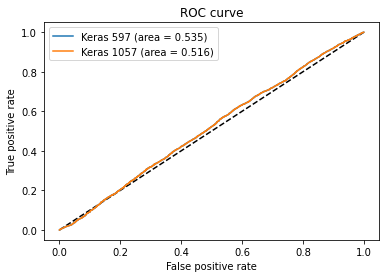

In [61]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras 597 (area = {:.3f})'.format(auc_keras_597))
plt.plot(fpr_keras, tpr_keras, label='Keras 1057 (area = {:.3f})'.format(auc_keras_1057))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# 4 - NN_Bilanciato

In [58]:
model1_sb_1057 = build_model_1(xtrain_sb_1057)
history1_sb_1057 = model1_sb_1057.fit(xtrain_sb_1057, ytrain_sb_1057, validation_data=(xtest_sb_1057, ytest_sb_1057), epochs=30, batch_size=10).history

model2_sb_1057 = build_model_2(xtrain_sb_1057)
history2_sb_1057 = model2_sb_1057.fit(xtrain_sb_1057, ytrain_sb_1057, validation_data=(xtest_sb_1057, ytest_sb_1057), epochs=30, batch_size=50).history

Epoch 1/30
1977/1977 [==============================] - 3s 2ms/step - loss: 0.6934 - auc: 0.4941 - val_loss: 0.6931 - val_auc: 0.5018
Epoch 2/30
1977/1977 [==============================] - 3s 1ms/step - loss: 0.6933 - auc: 0.4940 - val_loss: 0.6931 - val_auc: 0.5039
Epoch 3/30
1977/1977 [==============================] - 3s 1ms/step - loss: 0.6933 - auc: 0.4947 - val_loss: 0.6931 - val_auc: 0.5050
Epoch 4/30
1977/1977 [==============================] - 3s 1ms/step - loss: 0.6933 - auc: 0.4952 - val_loss: 0.6930 - val_auc: 0.5051
Epoch 5/30
1977/1977 [==============================] - 3s 1ms/step - loss: 0.6933 - auc: 0.4975 - val_loss: 0.6930 - val_auc: 0.5026
Epoch 6/30
1977/1977 [==============================] - 3s 1ms/step - loss: 0.6932 - auc: 0.4965 - val_loss: 0.6930 - val_auc: 0.5070
Epoch 7/30
1977/1977 [==============================] - 3s 1ms/step - loss: 0.6932 - auc: 0.4954 - val_loss: 0.6930 - val_auc: 0.5062
Epoch 8/30
1977/1977 [==============================] - 3s 1ms

In [59]:
test_loss_1_sb_1057, test_auc_1_sb_1057 = model1_sb_1057.evaluate(xtest_sb_1057, ytest_sb_1057)
test_loss_2_sb_1057, test_auc_2_sb_1057 = model2_sb_1057.evaluate(xtest_sb_1057, ytest_sb_1057)

print('Loss %f, AUC %f' % (test_loss_1_sb_1057, test_auc_1_sb_1057))
print('Loss %f, AUC %f' % (test_loss_2_sb_1057, test_auc_2_sb_1057))

265/265 [==============================] - 0s 947us/step - loss: 0.6934 - auc: 0.5000
Loss 0.692858, AUC 0.510615
Loss 0.693363, AUC 0.500000


In [66]:
allModels_sb_1057, r_sb_1057, model_sb_1057 = GridSearch(xtrain_sb_1057, ytrain_sb_1057, param_list, cv=3, rand=False)

0 (128, 100, 0.261, 0.9, False, 'tanh', 0.0001, 10, 1)
Epoch 1/100
103/103 [==============================] - 1s 5ms/step - loss: 0.6992 - auc: 0.5023 - val_loss: 0.6968 - val_auc: 0.5120
Epoch 2/100
103/103 [==============================] - 0s 2ms/step - loss: 0.6961 - auc: 0.4948 - val_loss: 0.6953 - val_auc: 0.5109
Epoch 3/100
103/103 [==============================] - 0s 2ms/step - loss: 0.6956 - auc: 0.5048 - val_loss: 0.6950 - val_auc: 0.5093
Epoch 4/100
103/103 [==============================] - 0s 2ms/step - loss: 0.6956 - auc: 0.4970 - val_loss: 0.6946 - val_auc: 0.5112
Epoch 5/100
103/103 [==============================] - 0s 2ms/step - loss: 0.6952 - auc: 0.5047 - val_loss: 0.6955 - val_auc: 0.5030
Epoch 6/100
103/103 [==============================] - 0s 2ms/step - loss: 0.6949 - auc: 0.5048 - val_loss: 0.6944 - val_auc: 0.5025
Epoch 7/100
103/103 [==============================] - 0s 2ms/step - loss: 0.6950 - auc: 0.5012 - val_loss: 0.6945 - val_auc: 0.5024
Epoch 8/100
10

Epoch 62/100
103/103 [==============================] - 0s 2ms/step - loss: 0.6964 - auc: 0.4938 - val_loss: 0.6947 - val_auc: 0.5057
Epoch 63/100
103/103 [==============================] - 0s 2ms/step - loss: 0.6931 - auc: 0.5165 - val_loss: 0.6969 - val_auc: 0.5137
Epoch 64/100
103/103 [==============================] - 0s 2ms/step - loss: 0.6938 - auc: 0.5084 - val_loss: 0.6943 - val_auc: 0.5059
Epoch 65/100
103/103 [==============================] - 0s 2ms/step - loss: 0.6943 - auc: 0.5003 - val_loss: 0.6945 - val_auc: 0.5153
Epoch 66/100
103/103 [==============================] - 0s 2ms/step - loss: 0.6948 - auc: 0.4977 - val_loss: 0.6941 - val_auc: 0.5054
Epoch 67/100
103/103 [==============================] - 0s 2ms/step - loss: 0.6943 - auc: 0.4968 - val_loss: 0.6962 - val_auc: 0.5185
Epoch 68/100
103/103 [==============================] - 0s 2ms/step - loss: 0.6937 - auc: 0.5083 - val_loss: 0.6934 - val_auc: 0.5110
Epoch 69/100
103/103 [==============================] - 0s 2ms

In [67]:
pred_sb_1057 = model_sb_1057.predict_classes(xtest_sb_1057)

In [69]:
y_pred_keras_sb_1057 = model_sb_1057.predict(xtest_sb_1057).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytest_sb_1057, y_pred_keras_sb_1057)
auc_keras_sb_1057 = auc(fpr_keras, tpr_keras)

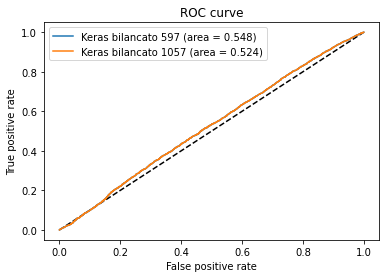

In [70]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras bilancato 597 (area = {:.3f})'.format(auc_keras_sb_597))
plt.plot(fpr_keras, tpr_keras, label='Keras bilancato 1057 (area = {:.3f})'.format(auc_keras_sb_1057))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()